In [2]:
authors = pd.read_csv("SOLE.csv")
authors.head()

,Article Title,Author,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,A Big Fish in a Small Pond: Ability Rank and H...,"Elsner, Benjamin; Isphording, Ingo E.",NaN,NaN,NaN,NaN
1,A Business Cycle Model with Private Information,"Smith, Bruce D.",NaN,NaN,NaN,NaN
2,A Dynamic Equilibrium Model of the US Wage Str...,"Johnson, Matthew; Keane, Michael P.",NaN,NaN,NaN,NaN
3,A Dynamic Model of Teacher Labor Supply,"Stinebrickner, Todd R.",NaN,NaN,NaN,NaN
4,A Dynamic Model of Weak and Strong Ties in the...,"Zenou, Yves",NaN,NaN,NaN,NaN


In [5]:
authors = authors.iloc[:,1:2]
authors.dtypes

Author    object
dtype: object

In [6]:
dictionary = {}
for names in authors["Author"]:
    try:
        for name in names.split(';'):
                name = name.strip()
                if name in dictionary:
                    dictionary[name] += 1
                else:
                    dictionary[name] = 1
    except AttributeError:
        print()

In [7]:
print(dictionary["Lazear, Edward P."])
print(len(dictionary))

10
1316


In [8]:
import csv

with open('People.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',', quoting=csv.QUOTE_MINIMAL)
    filewriter.writerow(['Author', 'Number of Articles Published'])
    for name in dictionary:
        filewriter.writerow([name, dictionary[name]])

In [9]:
authorCount = {}
for name in dictionary:
    if dictionary[name] in authorCount:
        authorCount[dictionary[name]] += 1
    else:
        authorCount[dictionary[name]] = 1
total = []
for val in authorCount:
    list = (val, authorCount[val])
    total.append(list)

In [10]:
#creating the dataframe for a seaborn plot
labels = ["Number of Articles Written", "Number of Authors"]
df = pd.DataFrame.from_records(total, columns=labels)
df.head()

,Number of Articles Written,Number of Authors
0,1,1019
1,2,178
2,4,29
3,3,59
4,10,1


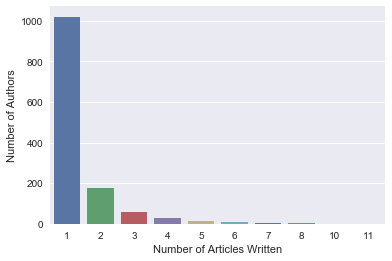

In [11]:
bar = sns.barplot(x="Number of Articles Written", y="Number of Authors", data=df, palette=sns.color_palette())

In [12]:
for (p, val) in zip(bar.patches, authorCount):
    height = p.get_height() + 5
    bar.text(p.get_x()+p.get_width()/2, height, authorCount[val], ha = 'center', va='bottom')
fig = bar.get_figure()
fig.savefig("barplotfigure.png")